In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# %cd gdrive/My Drive/Attention lstm implementation

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv', na_filter=True)
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [8]:
tr_data = data.drop(col_del,axis =1)
tr_data.shape

(284807, 10)

In [9]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [10]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [11]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 284315})


In [12]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [14]:
X_train.shape

(398041, 9)

In [15]:
X_test.shape

(170589, 9)

In [16]:
# # design network
# np.random.seed(7)

# # X_train et X_val sont des dataframe qui contient les features
# train_LSTM_X=X_train
# val_LSTM_X=X_test

# ## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
# train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
# val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

# ## Recuperation des labels
# train_LSTM_y = y_train
# val_LSTM_y = y_test

# design network
np.random.seed(10)
n_features = 9

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X = X_train
val_LSTM_X = X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y = y_train
val_LSTM_y = y_test 

# ## Define the model architecture
# inputs = Input(shape=(1, n_features))
# x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, input_shape=(1, n_features))(inputs)
# x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)
# outputs = Dense(1, activation='sigmoid')(x2)
# model = Model(inputs, outputs)


In [ ]:
inputs=Input((1,9))
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)(inputs)
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)
outputs = Dense(1, activation='sigmoid')(x2)
model = Model(inputs, outputs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
20/20 [==============================] - 12s 58ms/step - loss: 0.6703 - accuracy: 0.8235 - val_loss: 0.6350 - val_accuracy: 0.8858
Epoch 2/100
20/20 [==============================] - 1s 27ms/step - loss: 0.5916 - accuracy: 0.8769 - val_loss: 0.5211 - val_accuracy: 0.8882
Epoch 3/100
20/20 [==============================] - 1s 51ms/step - loss: 0.4674 - accuracy: 0.8789 - val_loss: 0.3902 - val_accuracy: 0.8926
Epoch 4/100
20/20 [==============================] - 1s 29ms/step - loss: 0.3560 - accuracy: 0.8887 - val_loss: 0.3019 - val_accuracy: 0.9029
Epoch 5/100
20/20 [==============================] - 1s 25ms/step - loss: 0.2945 - accuracy: 0.9012 - val_loss: 0.2607 - val_accuracy: 0.9098
Epoch 6/100
20/20 [==============================] - 1s 28ms/step - loss: 0.2636 - accuracy: 0.9092 - val_loss: 0.2334 - val_accuracy: 0.9112
Epoch 7/100
20/20 [==============================] - 1s 26ms/step - loss: 0.2451 - accuracy: 0.9138 - val_loss: 0.2150 - val_accuracy: 0.9178
Epoch

In [ ]:
# save model and architecture to single file
model.save('Save_Model.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('Save_Model.h5')
# summarize model.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 9)]            0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 50)             12000     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 32,251
Trainable params: 32,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.937, Test: 0.937


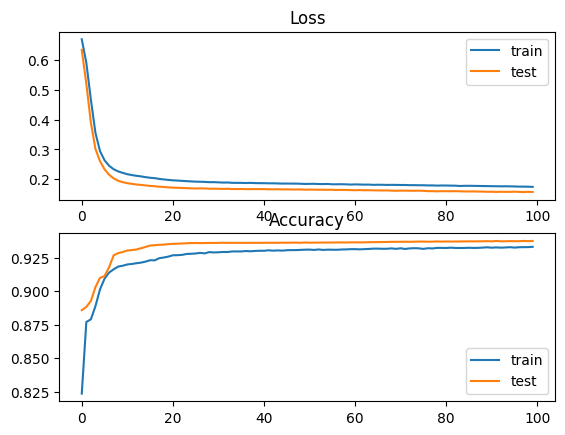

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [ ]:
yhat_binary = (yhat_probs > 0.5).astype(int)

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_binary)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_binary)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_binary)
print('Recall: %f' % recall)


Accuracy: 0.937388
Precision: 0.988895
Recall: 0.884655


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_binary)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']

Confusion matrix, without normalization
[[84485   847]
 [ 9834 75423]]


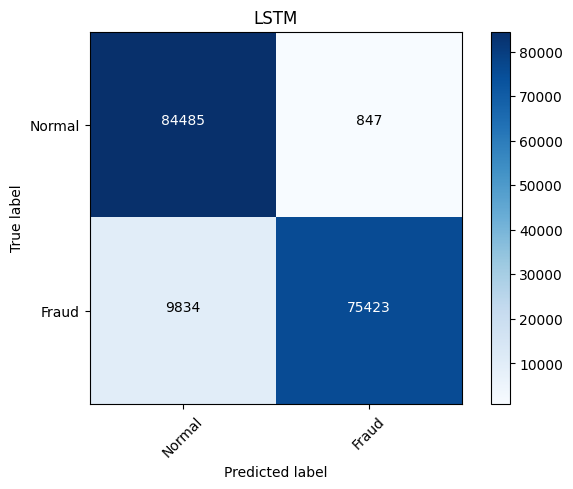

In [ ]:
plot_confusion_matrix(cm=cm, classes=labels, title='LSTM')

In [17]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [18]:
inputs1=Input((1,9))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [19]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history1=model1.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=30000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
14/14 [==============================] - 12s 73ms/step - loss: 0.6732 - accuracy: 0.8299 - val_loss: 0.6470 - val_accuracy: 0.8878
Epoch 2/100
14/14 [==============================] - 0s 30ms/step - loss: 0.6232 - accuracy: 0.8808 - val_loss: 0.5767 - val_accuracy: 0.8907
Epoch 3/100
14/14 [==============================] - 0s 29ms/step - loss: 0.5429 - accuracy: 0.8809 - val_loss: 0.4790 - val_accuracy: 0.8890
Epoch 4/100
14/14 [==============================] - 0s 26ms/step - loss: 0.4480 - accuracy: 0.8814 - val_loss: 0.3864 - val_accuracy: 0.8946
Epoch 5/100
14/14 [==============================] - 0s 27ms/step - loss: 0.3673 - accuracy: 0.8892 - val_loss: 0.3175 - val_accuracy: 0.9043
Epoch 6/100
14/14 [==============================] - 0s 28ms/step - loss: 0.3127 - accuracy: 0.8982 - val_loss: 0.2762 - val_accuracy: 0.9091
Epoch 7/100
14/14 [==============================] - 0s 28ms/step - loss: 0.2807 - accuracy: 0.9051 - val_loss: 0.2510 - val_accuracy: 0.9123
Epoch

In [21]:
# save Attention model and architecture to single file
model1.save('Save_Model_Attention.h5')
print("Saved model to disk")

Saved model to disk


In [1]:
# # load and evaluate a saved model
# from numpy import loadtxt
# from keras.models import load_model
# from keras.layers import Layer
# import keras.backend as K
# from numpy import loadtxt
# from keras.models import load_model
# from keras.utils import custom_object_scope
 
# # load model
# model1 = load_model('Save_Model_Attention.h5')
# # summarize model.
# model1.summary()

In [2]:
# # evaluate the model
# _, train_acc = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
# _, test_acc = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [3]:
# predict probabilities for test set
# yhat_probs1 = model1.predict(val_LSTM_X, verbose=0)
# # reduce to 1d array
# yhat_probs1 = yhat_probs1[:, 0]

In [4]:
# demonstration of calculating metrics for a neural network model using sklearn
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import confusion_matrix

# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(val_LSTM_y, yhat_probs1)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(val_LSTM_y, yhat_probs1)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(val_LSTM_y, yhat_probs1)
# print('Recall: %f' % recall)


In [ ]:
# cm1 = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs1)

Confusion matrix, without normalization
[[84296   879]
 [ 9297 76117]]


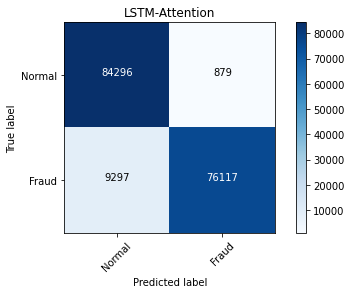

In [ ]:
plot_confusion_matrix(cm=cm1, classes=labels, title='LSTM-Attention', normalize=False)